In [1]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import smooth

default ICM (5, 20)
default Disagreement (5, 20)
default E3B (5, 20)
default RND (5, 20)
default PseudoCounts (5, 20)
default RIDE (5, 20)
default RE3 (5, 20)
default NGU (5, 20)
orthogonal ICM (5, 20)
orthogonal Disagreement (5, 20)
orthogonal E3B (5, 20)
orthogonal RND (5, 20)
orthogonal PseudoCounts (5, 20)
orthogonal RIDE (5, 20)
orthogonal RE3 (5, 20)
orthogonal NGU (5, 20)


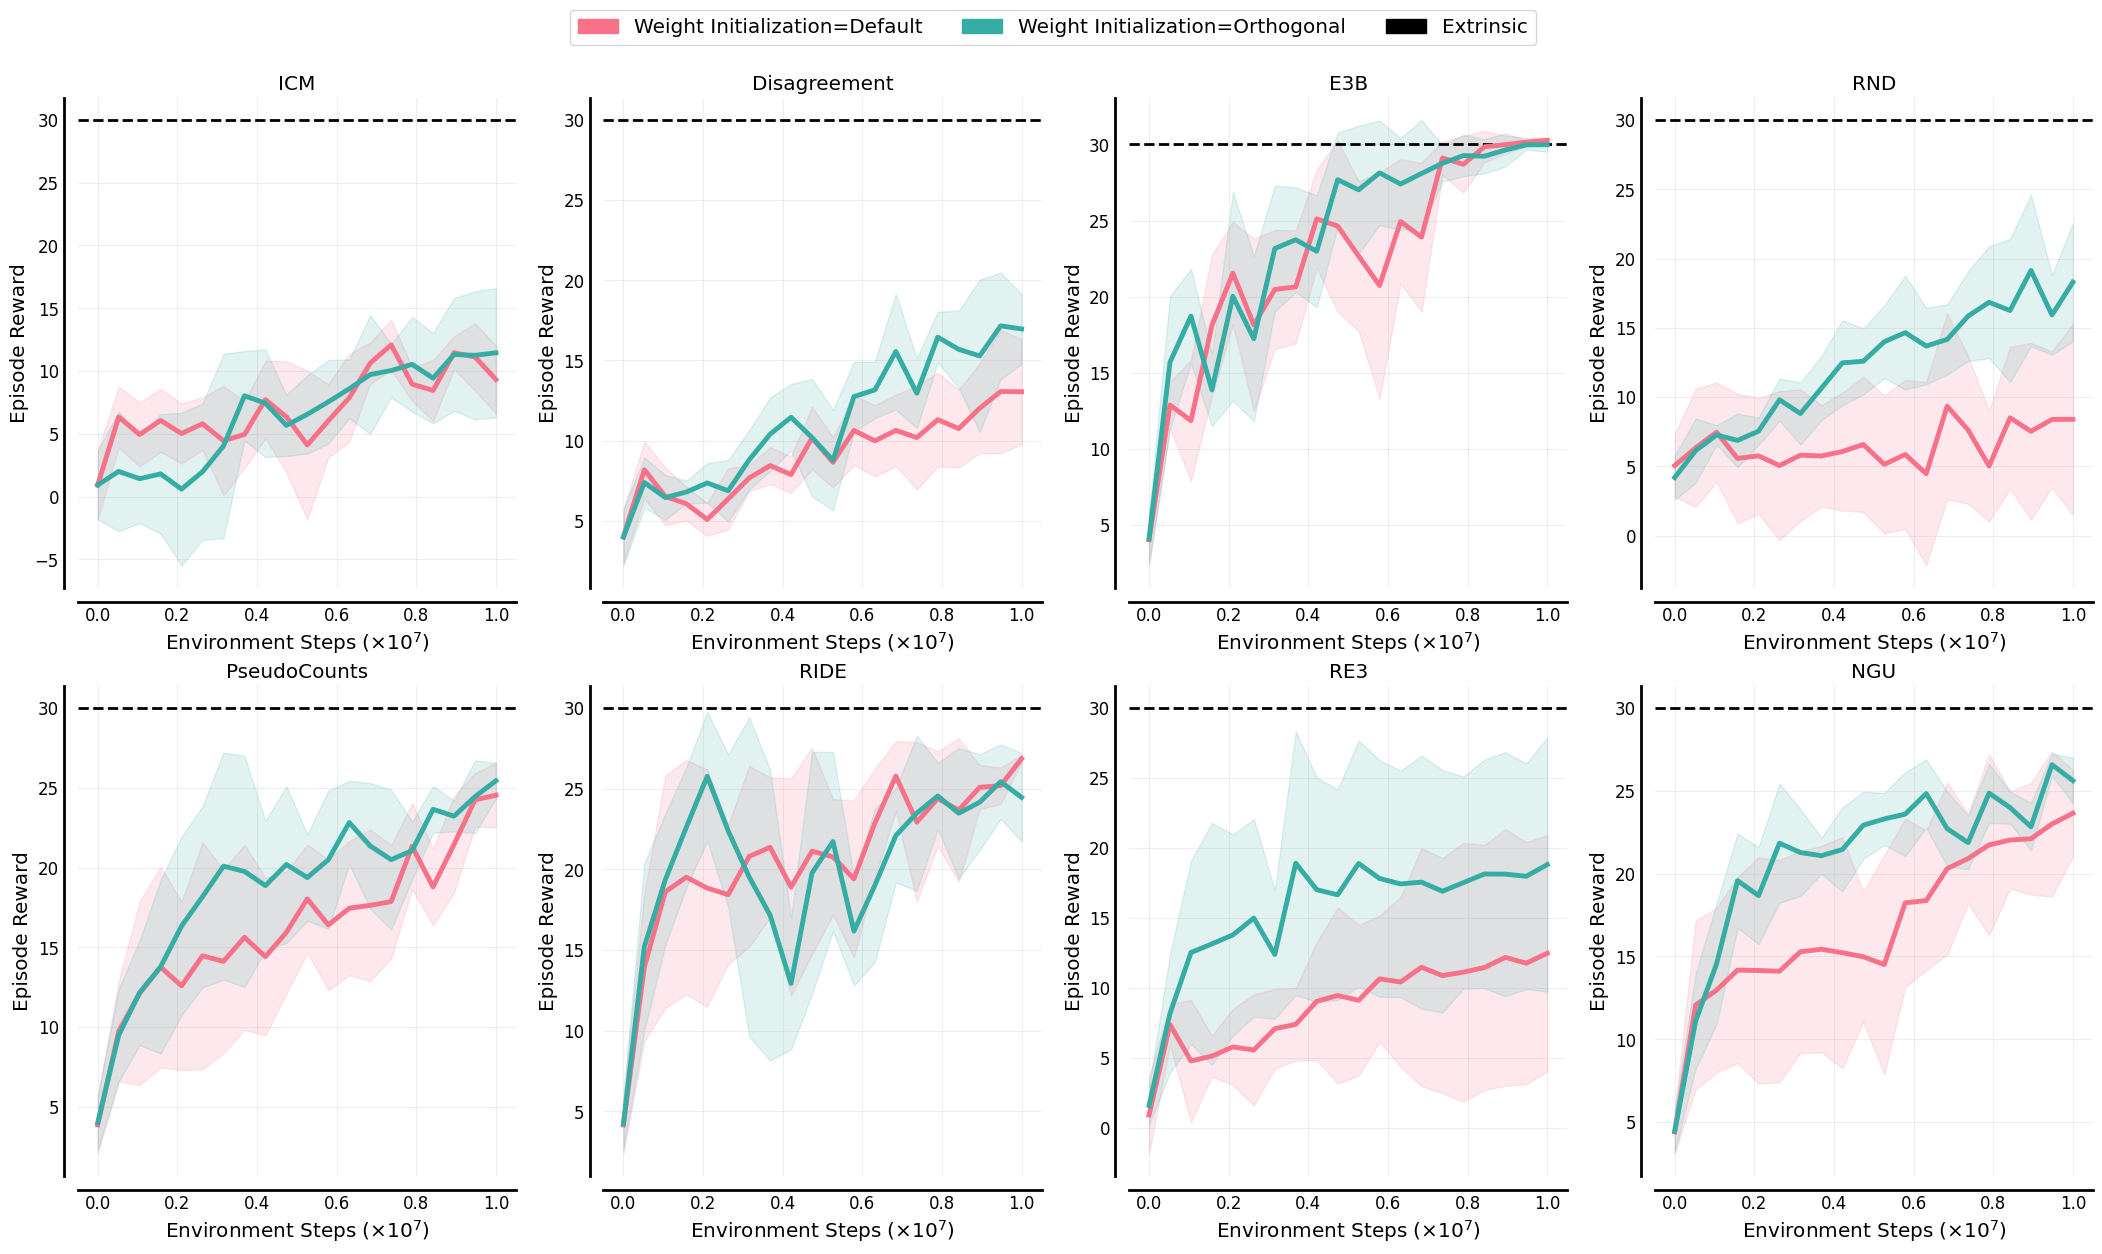

In [2]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
candidates = ['default', 'orthogonal']
legends = ['Weight Initialization=Default', 'Weight Initialization=Orthogonal', 'Extrinsic']
colors = sns.husl_palette(len(candidates))
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(candidates)]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

fig, axes = plt.subplots(2, 4, figsize=(26, 14))

for subplot_idx, candidate in enumerate(candidates):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/q4_new/{candidate}/"
    num_points = 20
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1.0, num_points)
        if subplot_idx == 0:
            ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
        
        ax.plot(x, mean, linewidth=3.5, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        # ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq4_curves.pdf', bbox_inches='tight', dpi=300)

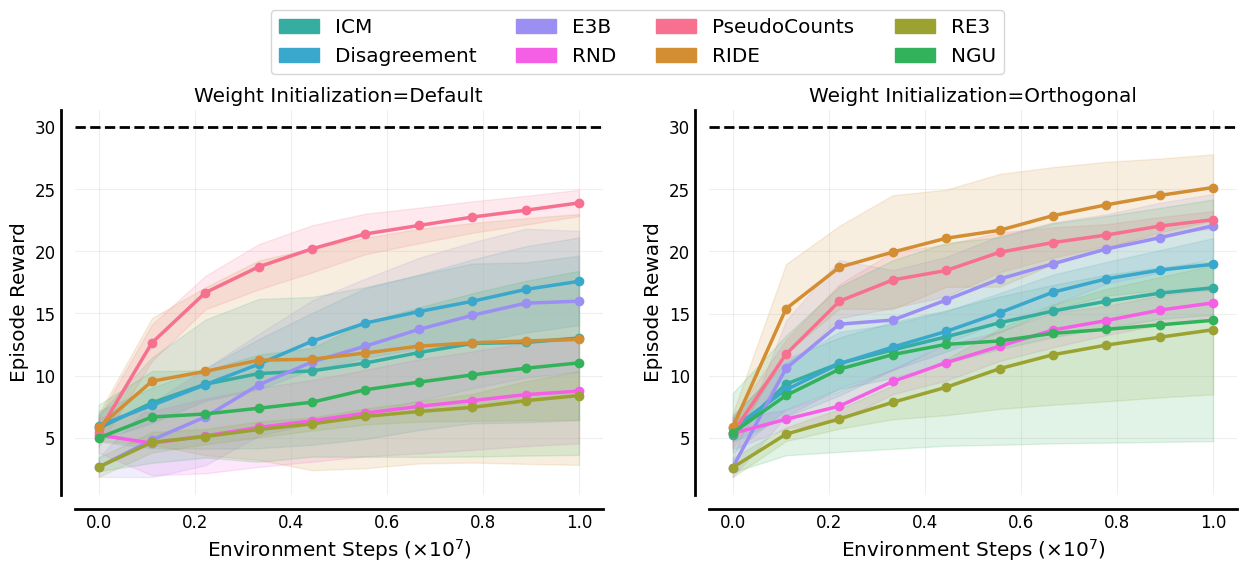

In [5]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
titles = ['Weight Initialization=Default', 'Weight Initialization=Orthogonal']
# colors = sns.color_palette("husl", len(algos))
colors = sns.husl_palette(len(algos), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for subplot_idx, candidate in enumerate(['default', 'orthogonal']):
    root = f"./data/q4/{candidate}/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    ax = axes[subplot_idx]

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])

    x = np.linspace(0, 1, num_points)
    ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
    for algo, color in zip(algos, colors):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=color, label=algo)
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=color)

    ax.set_title(titles[subplot_idx], fontsize="x-large")
    ax = _annotate_and_decorate_axis(ax, 
                                    ticklabelsize="large",
                                    xlabel=r"Environment Steps ($\times 10^7$)", 
                                    ylabel="Episode Reward",
                                    xticklabels=np.linspace(0, 1, num_points),
                                    )
fig.legend(fake_patches, algos, loc='upper center', 
    fancybox=True, ncol=4,
    fontsize='x-large',
    bbox_to_anchor=(0.5, 1.1))
fig.savefig('figure_rq4_curves.pdf', bbox_inches='tight', dpi=300)

### Bar

/home/roger/Desktop/rllte/all_mario_runs//obs. norm./PPO_SuperMarioBros-1-1-v3_re3_obsRMS:True_rewNorm:rms_updateProp:1.0_rff:False_s1//2024-02-13-07-43-46/train.log


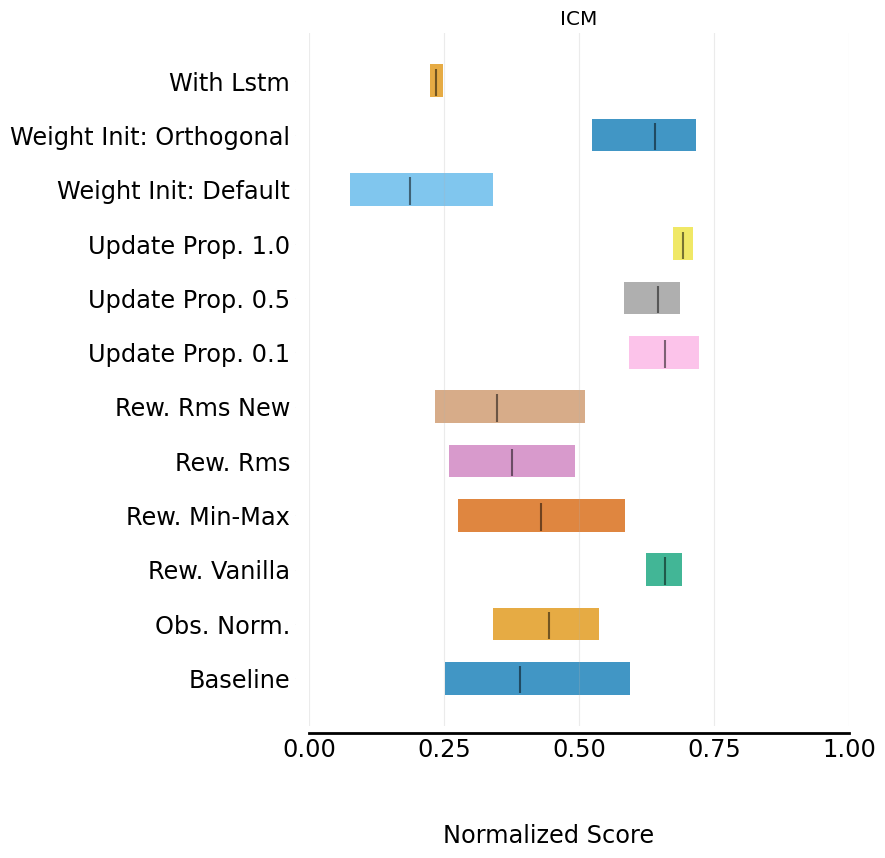

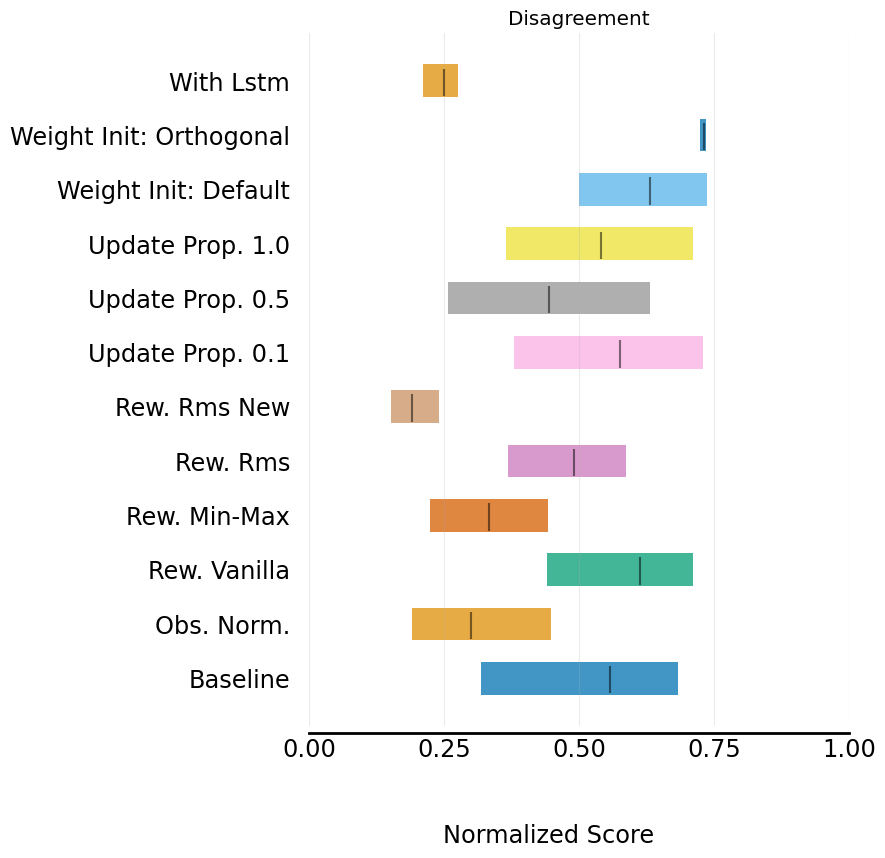

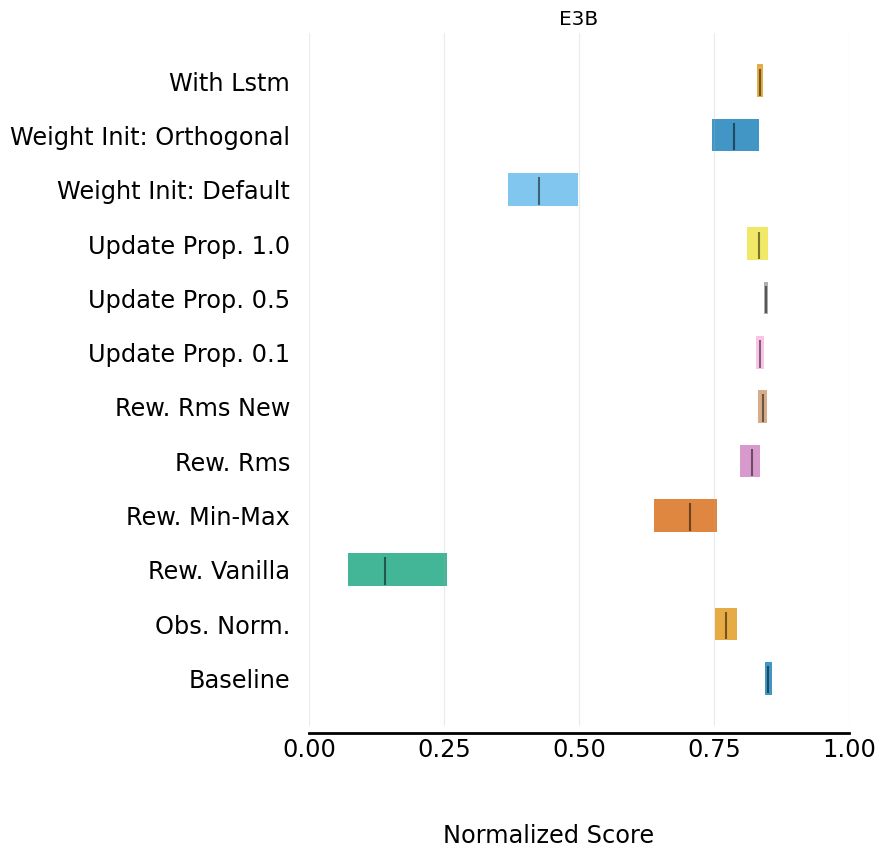

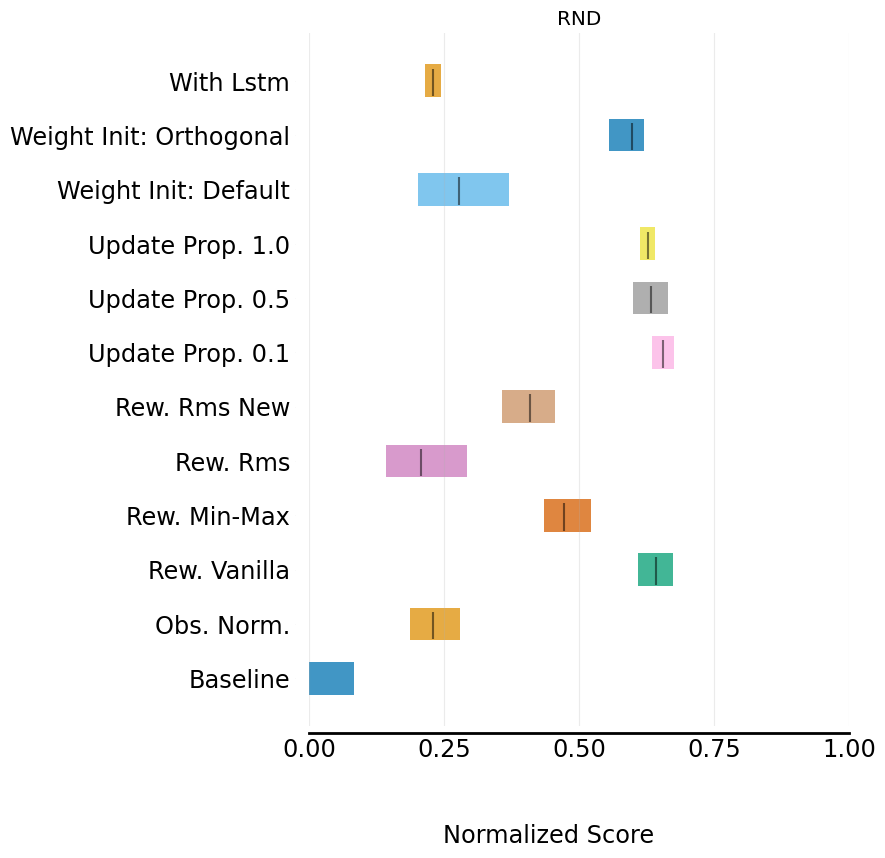

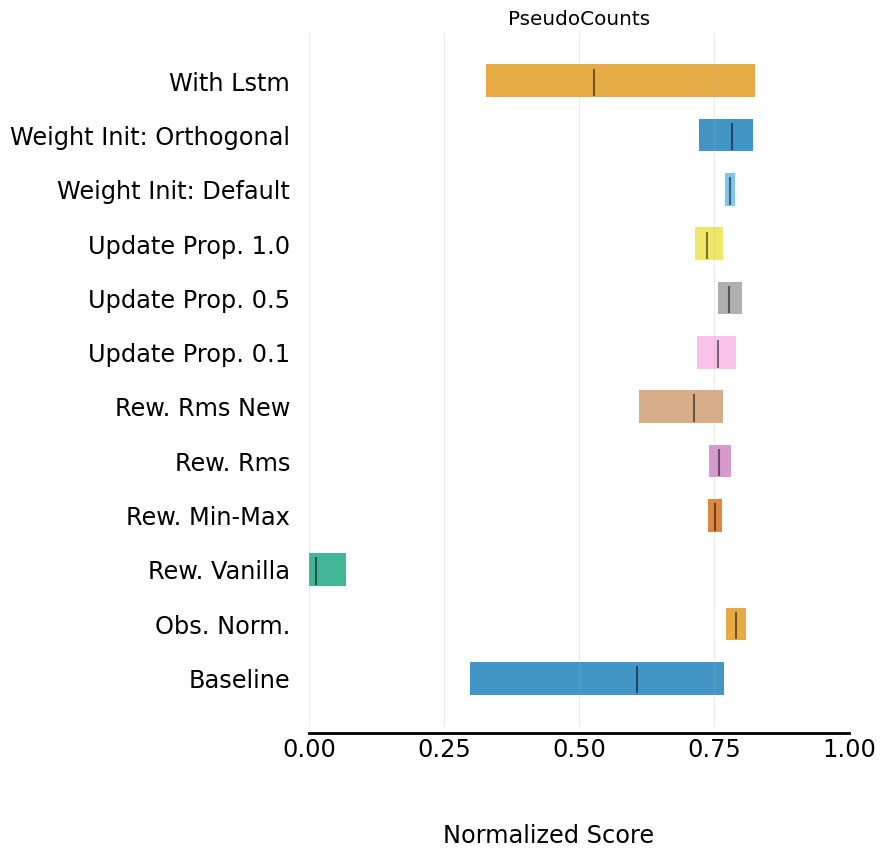

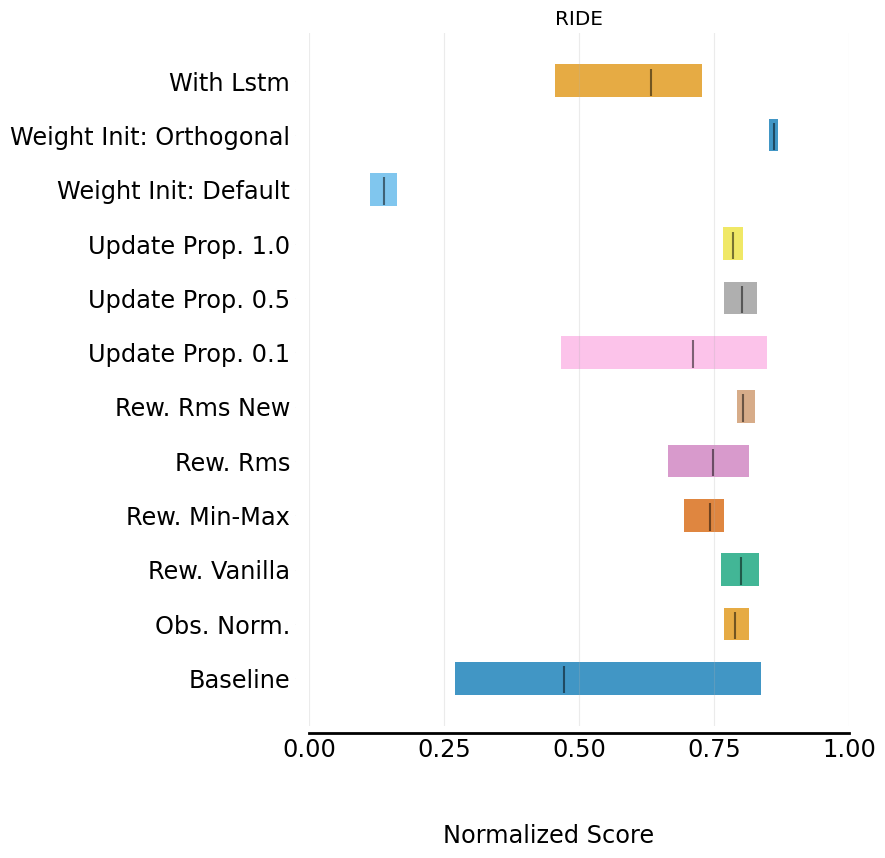

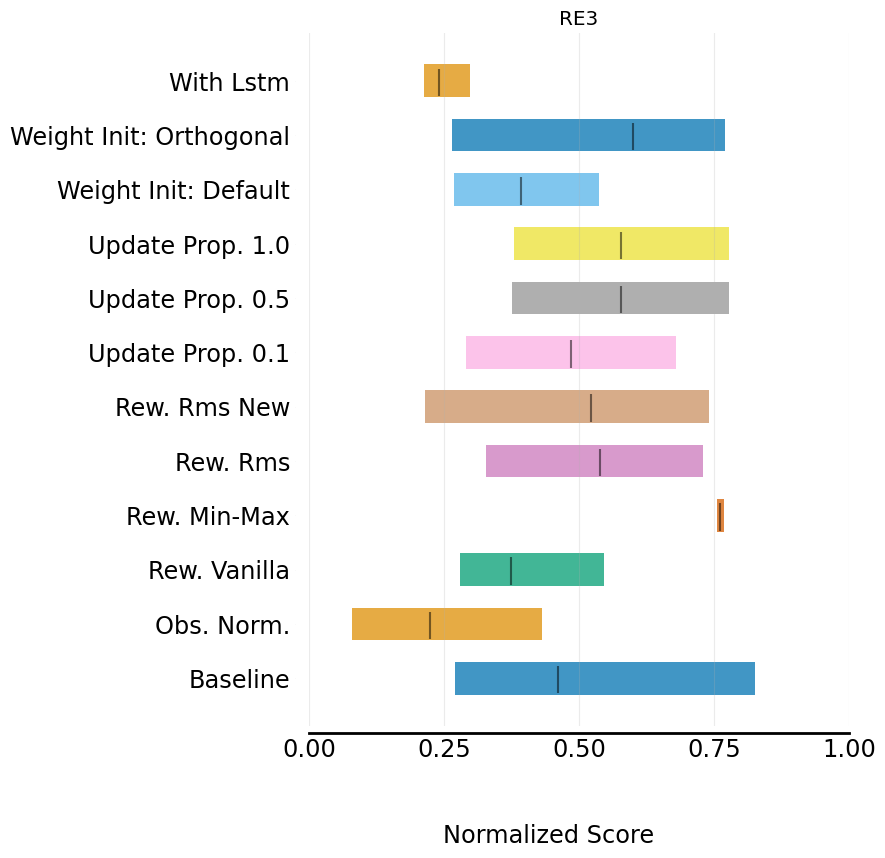

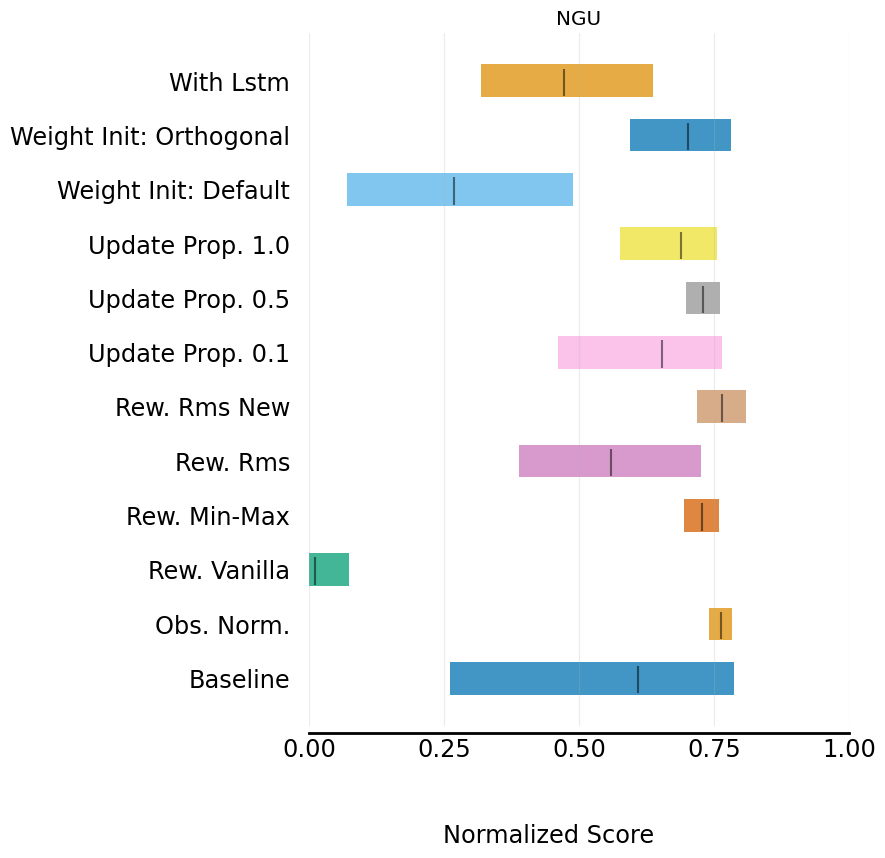

In [10]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
for algo in algos:
    num_last_episodes = 100
    max_episode_return = 35
    root = "/home/roger/Desktop/rllte/all_mario_runs/"
    types = ['Baseline', 'Obs. Norm.', 'Rew. Vanilla', 'Rew. Min-Max', 'Rew. Rms', 'Rew. Rms New', 'Update Prop. 0.1', 'Update Prop. 0.5', 'Update Prop. 1.0', 'Weight Init: Default', 'Weight Init: Orthogonal', 'With Lstm']
    colors = sns.color_palette("husl", len(types))
    all_data = {type: [] for type in types}

    for type in types:
        for dir in os.listdir(root + type.lower()):
            if algo.lower() in dir:
                file = f"{root}/{type.lower()}/{dir}/"
                file = file + '/' + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                try:
                    data = pd.read_csv(file)['episode_reward']
                except:
                    print(file)
                    continue
                data = data[-num_last_episodes:]
                all_data[type].append(data)

        all_data[type] = np.array(all_data[type]).mean(axis=1, keepdims=True) / max_episode_return

    aggregate_performance_dict = {
        "MEAN": {},
        #"MEDIAN": {},
        #"IQM": {},
        #"OG": {}
    }
    for type in all_data.keys():
        perf = Performance(scores=all_data[type], get_ci=True)
        aggregate_performance_dict['MEAN'][type] = perf.aggregate_mean()
        #aggregate_performance_dict['MEDIAN'][type] = perf.aggregate_median()
        #aggregate_performance_dict['IQM'][type] = perf.aggregate_iqm()
        #aggregate_performance_dict['OG'][type] = perf.aggregate_og()

    fig, ax = plot_interval_estimates(aggregate_performance_dict, 
                                    metric_names=['MEAN'],# 'IQM'], #'MEDIAN', 'IQM', 'OG'], 
                                    algorithms=types, 
                                    xlabel="Normalized Score",
                                    subfigure_width=6,
                                    xlabel_y_coordinate=-0.02,
                                    row_height=0.75)
    
    # set 1 single title to algo
    #for ax in axes:
    ax.set_title(algo, fontsize="x-large")

    #for ax in axes:
    ax.set_xlim([0, 1])
        
    #for ax in axes:
    # ax.axhline(y=0.5, color='k', linestyle='--', linewidth=2, alpha=0.5)
    # ax.axhline(y=1.5, color='k', linestyle='--', linewidth=2, alpha=0.5)
    # ax.axhline(y=4.5, color='k', linestyle='--', linewidth=2, alpha=0.5)
    # ax.axhline(y=7.5, color='k', linestyle='--', linewidth=2, alpha=0.5)
    # ax.axhline(y=9.5, color='k', linestyle='--', linewidth=2, alpha=0.5)